## Part 1 implementing QAOA


### Question1 :
Write down in the cell below the Hamiltonian whose ground state is the solution to MaxCUT on an input graph $G=(V,E)$:

$$ H = \sum_{i,j\in E} \sigma_i \cdot \sigma_j $$

### Question 2:
Complete the implementation below of a simple, brute-force enumeration of all states computing the optimal solution to MaxCUT for the graph represented by 'edges'

In [1]:
import numpy as np

graph1 = [(0,1),(0,2),(1,3),(2,3)]
graph2 = [(0,1),(1,2),(0,3),(1,4),(2,5),(3,6),(4,7),(5,8),(3,4),(4,5),(6,7),(7,8)]
graph3 = [(0,1),(1,2),(0,3),(1,4),(2,5),(3,6),(4,7),(3,4),(4,5),(6,7)]
graph4 = [(0,1),(1,2),(2,3),(4,5),(5,6),(6,7),(0,4),(1,5),(2,6),(3,7)]
graph5 = [(0,1),(0,2),(1,3),(2,4),(3,5),(4,5),(1,4)]
graph6 = [(0,1),(0,2),(1,3),(2,4),(1,4)]


# choice of graph
edges = graph6

nqubits = max([max(list(v)) for v in edges])+1

#nqubits = 5
graph7 = [(i,(i+1)%nqubits) for i in range(nqubits)]+[(1,4)]


# COMPUTATION OF OPT.
best_value = len(edges)
best_b = 0
for x in range(2**nqubits):
    b = np.binary_repr(x, width=nqubits)
    b = [int(b[i]) for i in range(nqubits)]
    # TODO: Complete the computation below:
    val = 0
    for i,j in edges:
        if b[i] != b[j]:
            val-=1
        else:
            val+=1
    # END TODO
    if val <= best_value:
        best_value = val
        best_b = b
print(best_value)
print(best_b)

-5
[1, 0, 0, 1, 1]


#### visualization of the graph

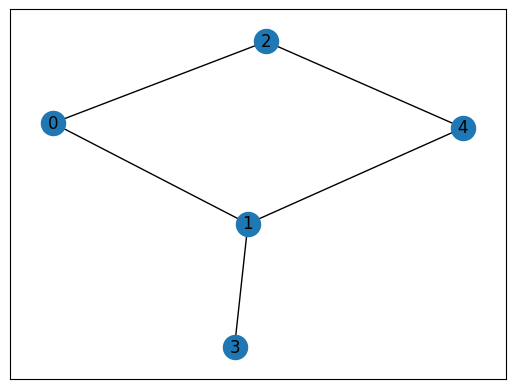

In [2]:
import networkx as nx
G = nx.Graph()
for i,j in edges:
    G.add_edge(i,j)
nx.draw_networkx(G)

In [3]:
from qat.lang.AQASM import Program, H, CNOT, RX, QRoutine, RZ, X, Z

In [4]:
def U_ZZ(theta):
    
    zz_r = QRoutine()
    zz_r.apply(CNOT, 0, 1)
    zz_r.apply(RZ(theta), 1) # difference of convention between implemented version and what we need.
    zz_r.apply(CNOT, 0, 1)

    return zz_r

### Question 3

In [5]:
def one_qaoa_layer(n_qubits, edges, theta, beta):

    layer = QRoutine()
    #TODO: implement one qaoa layer
    for i,j in edges:
        layer.apply(U_ZZ(theta),i,j)
        
    for i in range (n_qubits):
        layer.apply(RX(beta),i)

    
    return layer

In [6]:
for i in range(0,10,2):
    print(i, i+1)

0 1
2 3
4 5
6 7
8 9


### Question 4

In [7]:
from qat.qpus import get_default_qpu

def evaluate_parameters(n_qubits, edges, parameters, n_layers):
    
    prog = Program()
    qubits = prog.qalloc(n_qubits)
    
    # TODO: implement initialization+parameterized circuit
        
        #ordering theta and beta
    theta,beta = [],[]
    for i in range(0,2*n_layers,2):
        theta.append(parameters[i])
        beta.append(parameters[i+1])
    
    
        #initialisation
    for i in range (n_qubits):
        prog.apply(H,qubits[i])
        
        #qaoa layers
    for i in range (n_layers):
        prog.apply(one_qaoa_layer(n_qubits, edges, theta[i], beta[i]),qubits)

        
    # END TODO
    circ = prog.to_circ()
    
    job = circ.to_job()
    qpu = get_default_qpu()
    
    result = qpu.submit(job)
    
    # BEGIN TODO
    obs = 0
    for sample in result:
        # this loop is over all 2**nqubits states.
        # sample.state.bitstring contains the qubit values (nqubits 0 or 1)
        for i,j in edges:
            if sample.state.bitstring[i] != sample.state.bitstring[j]:
                obs -= sample.probability
            else :
                obs += sample.probability
    # END TODO
    return obs
    
        

In [8]:
import numpy as np
np.random.random(3)

array([0.17776515, 0.08855092, 0.85984968])

In [9]:
from scipy.optimize import minimize


### Random initialisation

### Question 5: 
réponse à la question:

-0.4844310919629441 -1.6251026042268155 -2.078101276588654 -2.234347751221439 -2.3629745234429302 -2.5837844217164605 -2.77461924378119 -3.066031109978249 -3.3536214611770845 -3.4991509782715116 -3.7197356813532956 -3.9295641502224354 -4.002912797780277 -4.104608713699804 -4.161037132690453 -4.244773456264835 -4.3618507772758806 -4.499055114331296 -4.563671046895224 -4.673187608534281 -4.745929057151635 -4.789940477187152 -4.808481469827297 -4.829788863997638 -4.839809577148698 -4.849055614102083 -4.854148755179006 -4.858213968504187 -4.860899196528211 -4.864601821211148 -4.8671847590429245 -4.869673939396214 -4.873342802855695 -4.87691824898839 -4.879689105839962 -4.881301682821715 -4.881524959874526 -4.88188359539612 -4.882117278430202 -4.882145828305171 -4.882183758309188 -4.882198134493575 -4.882199493652331 -4.882199560807931 -4.882199562965372 -4.882199563015328 0.3296397785656773 0.21570150708632224 -0.8817550056019939 -1.33333786024302 -2.108241002959091 -2.5028442557321875 -2.

-4.764464420123039 -4.774258133552957 -4.781175669508396 -4.790493501196482 -4.800982873800781 -4.814129271721146 -4.819265963640832 -4.824992059975658 -4.830893600465798 -4.836521587129984 -4.842763729343351 -4.84589189740733 -4.848705087206652 -4.850909765368961 -4.854281866567756 -4.860292817521131 -4.86869434362414 -4.872117670957703 -4.874300499841304 -4.8774527729965875 -4.879408488484645 -4.881278757557495 -4.883972332046727 -4.8868333076376675 -4.888981956998131 -4.892744040909562 -4.899139204349443 -4.90645943080493 -4.91025059912877 -4.915807675141349 -4.919218508814885 -4.922905889630481 -4.928364513544548 -4.9322305233021115 -4.934049700426932 -4.934819012313752 -4.9356694655017135 -4.936924791514616 -4.938819965337183 -4.940778382259548 -4.941571853398675 -4.942008241669124 -4.9422856356868445 -4.942624289169474 -4.942891996266692 -4.943087970671959 -4.943365960838074 -4.943648816332259 -4.94390932693065 -4.94408624769901 -4.944186858370709 -4.944244041519833 -4.9442676736

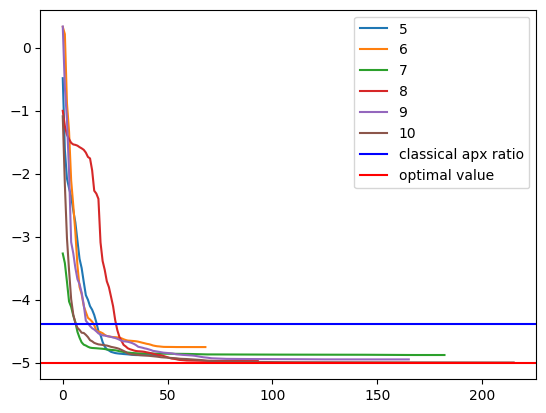

In [10]:
import matplotlib.pylab as plt


for nlayers in range(5,11,1):
    num_params = 2*nlayers

    back_trace = []
    def print_avg(xk):
        eva = evaluate_parameters(nqubits, edges, xk,nlayers)
        back_trace.append(eva)
        print(eva, end=' ')

    opt_res = minimize(lambda x : evaluate_parameters(nqubits, edges, x, nlayers), 
                       np.random.random(num_params),
                       callback=print_avg,)
    plt.plot(back_trace,label=str(nlayers))
# there exists a classical polynomial algorithm returning solutions within a factor of 0.878 of the optimal
# we must at least beat that. https://fr.wikipedia.org/wiki/Coupe_maximum
plt.axhline(0.878*best_value, color='b', label="classical apx ratio")
plt.axhline(best_value,color='r',label='optimal value')
plt.legend()

### Answer to q5: 
To reach the optimum value, we need around 8 layers of qaoa (or more). The result may slightly vary because we used random initial parameters.

### Question 6: smart initialization

### Answer to q6: 
Using the indications in q6, we can write the transition as:

$$\mathrm{exp} \left ( -i \int \mathrm{H}(s) \mathrm{d}s\right ) = \prod_k^p \left ( \prod_i \mathrm{exp}^{-i (1-\frac{k}{p})\frac{T}{p} \sigma_x^i} \mathrm{exp}^{-i\frac{k}{p}\frac{T}{p} \mathrm{H}_C}\right )$$

It corresponds to a qaoa circuit with p layers, and we can identify the parameters :
$$\theta_k = (1-\frac{k}{p})\frac{T}{p}$$
$$\beta_k = \frac{k}{p}\frac{T}{p}$$

0.8894961646333125 0.4378550835021242 -0.33622387213151156 -1.6208360440654304 -1.9128846455426842 -2.26023930226236 -2.713794019790648 -3.3843611055769327 -3.7427331918146534 -4.141755600994341 -4.496269712726901 -4.536557746055186 -4.5935583578020145 -4.6309755240763595 -4.641984779733589 -4.659710518208725 -4.680828029609171 -4.685009380938932 -4.692192322499222 -4.703330271293394 -4.71067862138261 -4.715202090779401 -4.719729369914251 -4.7236888112473725 -4.725440587120869 -4.726832602410956 -4.729081915691254 -4.73222094347868 -4.735874854769264 -4.739894198113974 -4.745831644659816 -4.749451804181597 -4.7516832922219185 -4.753261599390867 -4.754176156442591 -4.755258033575771 -4.756999198567995 -4.759331353942995 -4.761441399212935 -4.763476439256277 -4.764233507283621 -4.765286283325667 -4.766502239015364 -4.7679394121619145 -4.768994359358177 -4.769737188096268 -4.7709335216485185 -4.7723734030706995 -4.7726724567219945 -4.773119201006832 -4.773370251200714 -4.773430906643483 -

-4.951091050814965 -4.951226399179364 -4.951384791345013 -4.951539771093489 -4.951672692380474 -4.951768324139929 -4.951894623843722 -4.952044401249438 -4.952195241165483 -4.952307175380672 -4.952389109767257 -4.952424440650751 -4.952467532752107 -4.9525052280273885 -4.952564405844413 -4.952630496918213 -4.952672718932433 -4.952715275949887 -4.95273213498735 -4.9527486180338025 -4.952759241278297 -4.952766961497083 -4.95277528128686 -4.952788813362976 -4.952811806630125 -4.952850926756218 -4.952913522685263 -4.952996022367521 -4.95302275642044 -4.953046091930211 -4.953057087560227 -4.953069376775967 -4.953079878641536 -4.9530937934718215 -4.953099179788733 -4.953101414215977 -4.953104014789093 -4.953108520307367 -4.9531166761700804 -4.9531315781072065 -4.953158541337148 -4.953204920715832 -4.953272651481674 -4.9533325715518695 -4.9533493304263105 -4.9533693360956175 -4.953372089448539 -4.953373017434794 -4.953373606585898 -4.9533737776432645 -4.953373923305249 -4.953374100489151 -4.953

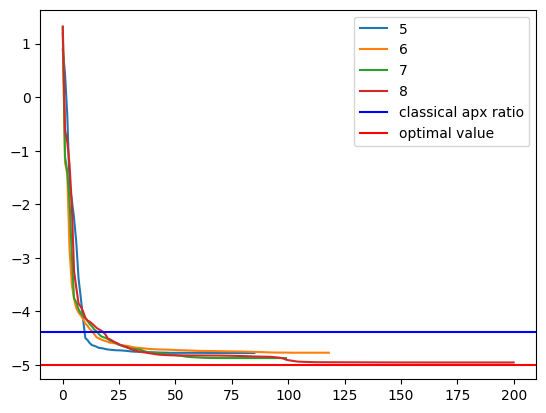

In [11]:
T = 1.

for nlayers in range(5,9,1):
    num_params = 2*nlayers

    back_trace = []
    def print_avg(xk):
        eva = evaluate_parameters(nqubits, edges, xk,nlayers)
        back_trace.append(eva)
        print(eva, end=' ')

    # TODO implement parameter init
    parameters_init = []
    
    for k in range(nlayers):
        parameters_init.append((1-k/nlayers)*T/nlayers)
        parameters_init.append((k/nlayers)*T/nlayers)

    # END TODO        
    opt_res = minimize(lambda x : evaluate_parameters(nqubits, edges, x, nlayers), 
                       parameters_init, 
                       callback=print_avg,)
    plt.plot(back_trace,label=str(nlayers))
plt.axhline(0.878*best_value, color='b', label="classical apx ratio")
plt.axhline(best_value,color='r',label='optimal value')
plt.legend()

-1.3122344142819253 -2.059438432445509 -2.5708389590009504 -2.8370701939025254 -3.0871712175016355 -3.4703086806049757 -3.6868966082020562 -3.7653527034574448 -3.8808517338658652 -3.9881369933189745 -4.028243058498514 -4.068335569792155 -4.11011791745036 -4.1210746863134196 -4.1325645167057665 -4.137647587605134 -4.143081554351031 -4.145583471055401 -4.149499888771936 -4.155104942209334 -4.159524539547759 -4.160876556925143 -4.163403376555542 -4.168010609706825 -4.176092057111545 -4.1897520492068665 -4.200210476576187 -4.218608725330302 -4.252673006373902 -4.279415527440727 -4.314175916132241 -4.34583397971511 -4.39179482233779 -4.45953163189783 -4.499343748706121 -4.52395018551377 -4.5547122702462675 -4.573654119862778 -4.581261521272366 -4.5935214612136575 -4.609806410283497 -4.634919158087763 -4.6605384626799 -4.666641065243909 -4.67054386537637 -4.6768719468094595 -4.679444968002733 -4.680982611418001 -4.681633592631358 -4.6821233450487405 -4.682430630942612 -4.6828063461803335 -4.

-4.969766689822558 -4.9698212341826435 -4.969882253104238 -4.969993951089371 -4.970184909754897 -4.970320640353119 -4.970522171514594 -4.970724636154928 -4.970894106904051 -4.971164874394147 -4.971542910242676 -4.97171959948821 -4.97177144913393 -4.971842708561702 -4.97190885013523 -4.971953669822287 -4.97197234484791 -4.971975050799984 -4.97197690280839 -4.9719799023318645 -4.971983388341645 -4.971985052627018 -4.97198783190628 -4.9719925036300445 -4.9720004300599525 -4.972013808165195 -4.972035466268281 -4.9720665448163786 -4.97209715766089 -4.972121600799255 -4.972126823956676 -4.972127907006062 -4.972129460632638 -4.972130326551161 -4.972130593216334 -4.9721306847781985 -4.972130697454107 -4.972130697679143 -4.972130697725432 

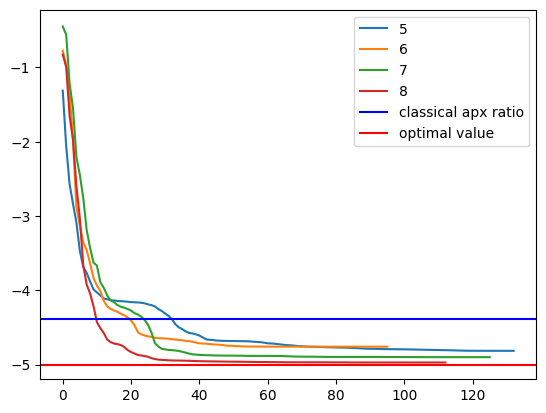

In [12]:
T = 10.

for nlayers in range(5,9,1):
    num_params = 2*nlayers

    back_trace = []
    def print_avg(xk):
        eva = evaluate_parameters(nqubits, edges, xk,nlayers)
        back_trace.append(eva)
        print(eva, end=' ')

    # TODO implement parameter init
    parameters_init = []
    
    for k in range(nlayers):
        parameters_init.append((1-k/nlayers)*T/nlayers)
        parameters_init.append((k/nlayers)*T/nlayers)

    # END TODO        
    opt_res = minimize(lambda x : evaluate_parameters(nqubits, edges, x, nlayers), 
                       parameters_init, 
                       callback=print_avg,)
    plt.plot(back_trace,label=str(nlayers))
plt.axhline(0.878*best_value, color='b', label="classical apx ratio")
plt.axhline(best_value,color='r',label='optimal value')
plt.legend()

### Answer to q6: 
If we increase T, the results are less satisfactory because as we increase T, we need more layers to get the optimal value.(comparing the 2 plots above).
It is because the key assumption here is adiabatic. The time scale at which the system evolves is $\frac{\mathrm{T}}{p}. If we keep p constant and increase T, the time scale will increase and the evolution will not be adiabatic enough ! To solve this problem, we need to increase the number of layer p, and therefore we need more layer to achieve a correct result. This is the behaviour we observe here.

If we decrease T further, the convergence is even faster :

0.00823671111903021 -2.2847945517259154 -2.2888928824315484 -2.4468990615333146 -2.7195026027596882 -3.026602687752566 -3.5478038808126007 -3.744229075122626 -4.0918184686972054 -4.311185350990669 -4.537360382279272 -4.588607924667139 -4.6646744382974425 -4.713557574479269 -4.750461630191394 -4.763580578540146 -4.783164968995538 -4.808864297404444 -4.850874260380515 -4.863284054045802 -4.883132749696965 -4.899771518202284 -4.906844865064034 -4.909131909806634 -4.912398991123801 -4.91608292296656 -4.923214927625859 -4.928314700803548 -4.932715196191229 -4.937325188870292 -4.940631974064172 -4.942181873020086 -4.943727019216258 -4.945990733861794 -4.948278458510472 -4.9510836575727435 -4.955201340628904 -4.959967315124667 -4.962243244945778 -4.963065427406132 -4.963232942098979 -4.963490841421889 -4.963756884775867 -4.963923552375048 -4.964070879581271 -4.964114786766733 -4.9641371169524255 -4.964147641413058 -4.964150059057175 -4.964150260153882 -4.964150265958027 -4.964150266030162 -0.

-4.988600610797322 -4.98860113115303 -4.9886012184592525 -4.9886012916284095 -4.988601350948168 -4.98860144943672 -4.988601625988993 -4.988601952651532 -4.988602563475813 -4.988603703762508 -4.988605791081714 -4.988609414217299 -4.9886145985212185 -4.988618574243026 -4.988622679693029 -4.988628400716633 -4.988635599931991 -4.988648105556516 -4.988664799409641 -4.98866737769625 -4.9886778220657755 -4.988681008037423 -4.98868449396186 -4.988689641378396 -4.988697951321029 -4.988704000467955 -4.988713868945948 -4.988729541944833 -4.988738386009836 -4.988752670367052 -4.988775044539219 -4.988810178112622 -4.988830516489328 -4.988848641704874 -4.988882954367972 -4.989043548738802 -4.989109464554446 -4.989192245529728 -4.989266478649409 -4.9893337217528435 -4.989350942856398 -4.989371484344295 -4.989402318444026 -4.9894468913227925 -4.989491106212253 -4.989566061224637 -4.989683127445602 -4.989814424303561 -4.990019341347893 -4.990316218764207 -4.9906818879762085 -4.991162435321452 -4.991263

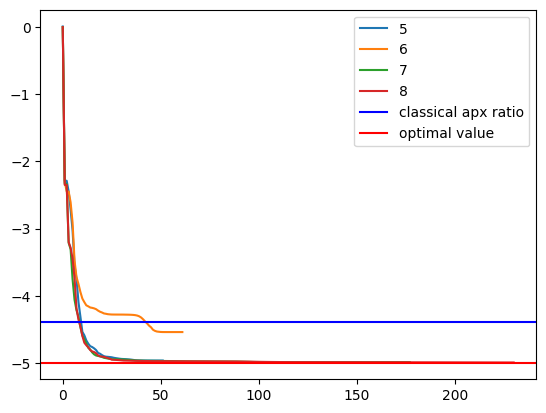

In [13]:
T = 0.1

for nlayers in range(5,9,1):
    num_params = 2*nlayers

    back_trace = []
    def print_avg(xk):
        eva = evaluate_parameters(nqubits, edges, xk,nlayers)
        back_trace.append(eva)
        print(eva, end=' ')

    # TODO implement parameter init
    parameters_init = []
    
    for k in range(nlayers):
        parameters_init.append((1-k/nlayers)*T/nlayers)
        parameters_init.append((k/nlayers)*T/nlayers)

    # END TODO        
    opt_res = minimize(lambda x : evaluate_parameters(nqubits, edges, x, nlayers), 
                       parameters_init, 
                       callback=print_avg,)
    plt.plot(back_trace,label=str(nlayers))
plt.axhline(0.878*best_value, color='b', label="classical apx ratio")
plt.axhline(best_value,color='r',label='optimal value')
plt.legend()